In [102]:
import pandas as pd
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

# normalize data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

X = df.drop('class', axis=1)
y = df['class']

In [103]:
# apply k-means clustering to the data
from sklearn.cluster import KMeans

kmeans = []
for i in range(3):
    kmeans.append(KMeans(n_clusters=3, random_state=i, init="random").fit(X))

import numpy as np
from sklearn.metrics.cluster import contingency_matrix

# define fuction to compute the purity of a clustering
def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

from sklearn.metrics import silhouette_score

# compute the purity and silhouette score for each clustering
for kmean in kmeans:
    print('K-means with random state =', kmean.random_state)
    print('Silhouette score: ', silhouette_score(X, kmean.labels_, metric='euclidean'))
    print('Purity score: ', purity_score(y, kmean.labels_),'\n')

K-means with random state = 0
Silhouette score:  0.11415638651071394
Purity score:  0.7645502645502645 

K-means with random state = 1
Silhouette score:  0.11413540017275367
Purity score:  0.7658730158730159 

K-means with random state = 2
Silhouette score:  0.11415638651071394
Purity score:  0.7645502645502645 



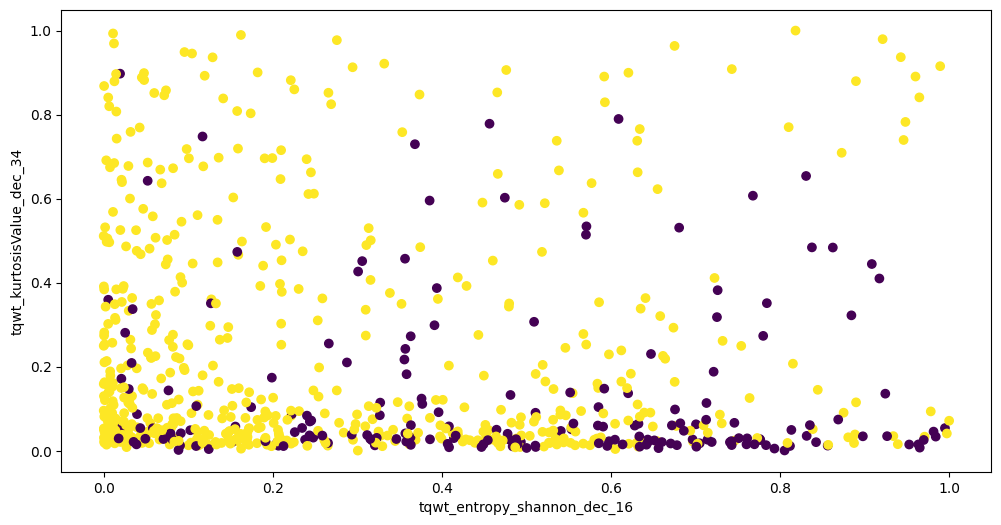

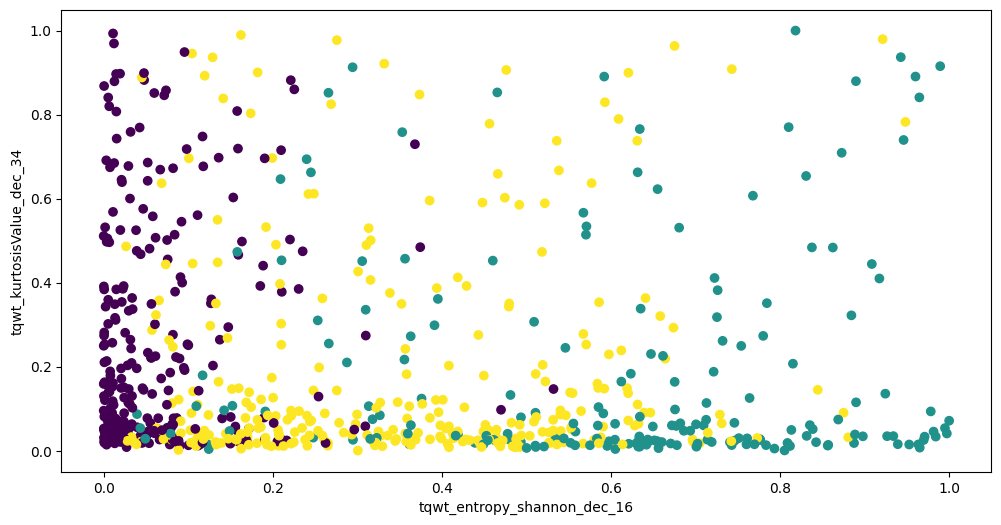

In [104]:
# get the index of the two features with highest variance
index1, index2 = X.var().sort_values(ascending=False).head(2).index

# plot data 
import matplotlib.pyplot as plt

for c in (y, kmeans[0].labels_):
    plt.scatter(X[index1], X[index2], c=c)
    plt.xlabel(X[index1].name)
    plt.ylabel(X[index2].name)

plt.show()


In [105]:
from sklearn.decomposition import PCA

# compute the number of components needed for 80% of the variance explained
pca = PCA(n_components=0.8, random_state=0)
pca.fit(X)
print(len(pca.components_), 'components explain 80% of the variance')

31 components explain 80% of the variance
